# Experimentations
## [TITLE FOR YOUR EXPERIMENTS]

## Instructions

- Create and checkout a branch for your work (`git checkout -b YOUR_BRANCH_NAME`)
- Create a copy of this template and name it however you want (e.g. `YOUR_NAME.ipynb`).
- Change the title according to what scenario you are testing.
- In the "involution" part, replace the existing model with the relevant model.
- Create as many cells as you deem necessary for the experiments (explain your use case, comparison with convolution or other networks, results, etc.).
- Remove this cell and every "TODO" comment.
- When you are done, commit your changes. Make sure you are only committing changes on the file you created! (you can check with `git status`)
- Push your changes on the repo (`git push --set-upstream origin YOUR_BRANCH_NAME`).
- Create a pull request to the `main` branch so that everyone can read your code before we merge it.

In [14]:

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#from involution import Involution

## Dataset import

In [ ]:
from google.colab import drive

import os

In [ ]:
from google.colab import drive

#Mounting the drive
drive.mount('/content/gdrive')

#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

%cd /content/gdrive/My Drive/Kaggle
#Downloading and unzip dataset

!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

In [ ]:
#Setting Training & Test dir paths
path_train = "/content/gdrive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/"
path_test = "/content/gdrive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/"

labels = pd.Series(os.listdir(path_test))

labels = labels.sort_values()
labels = labels.to_list()

labels

In [23]:
def get_data(path):
  """This function will be used to import dataset"""
  data = []
  for label in labels:
    label_path = os.path.join(path,label)
    class_num = labels.index(label)
    for img in os.listdir(label_path):
      an_image = plt.imread(os.path.join(label_path, img))
      data.append([an_image, class_num])
  return np.array(data)


In [25]:
data_train = get_data(path_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


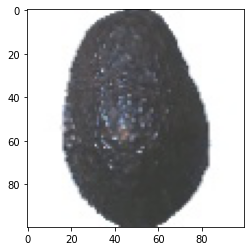

In [49]:
#image_ = plt.imread(data_train[10][0])

n = len(data_train)

i = np.random.randint(n)

plt.imshow(data_train[i][0])



## Involution

In [ ]:
# TODO: Replace this with your model

involution_model = tf.keras.models.Sequential([
    Involution(channel=3,group_number=1,kernel_size=3,stride=1,reduction_ratio=2),
    tf.keras.layers.ReLU(name="relu1"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Involution(channel=3,group_number=1,kernel_size=3,stride=1,reduction_ratio=2),
    tf.keras.layers.ReLU(name="relu2"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Involution(channel=3,group_number=1,kernel_size=3,stride=1,reduction_ratio=2),
    tf.keras.layers.ReLU(name="relu3"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
])

involution_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [ ]:
# TODO: Train your model

In [ ]:
# Uncomment after the model has been trained to see the layers
# involution_model.summary()

In [ ]:
# TODO: your code, models and experiments here
# The experiments should at least compare:
# - Accuracy
# - Number of parameters of the model
# - Training time (relative difference, precise the setup)